In [29]:
import pandas as pd
import numpy as np
import nltk

In [30]:
negative_words = []
positive_words = []

with open('words_negative.csv') as f:
    for line in f:
        negative_words.append(line.strip())

with open('words_positive.csv') as f:
    for line in f:
        positive_words.append(line.strip())

negative_words[:5]

['abysmal', 'adverse', 'alarming', 'angry', 'annoy']

In [34]:
def sentiment(text):
    tokens = nltk.word_tokenize(text)
    sent=[]
    for word in tokens:
        if word in positive_words:
            sent.append(1)
        if word in negative_words:
            sent.append(-1)
    if len(sent)==0:
        return 0
    return np.mean(sent)

In [35]:
#Read one of the comments csv files
df = pd.read_csv('./data/comments/DGdsIrAjp3k.csv')

#Get the rows
df.columns

Index(['0'], dtype='object')

In [36]:
youtube_data = pd.read_csv('./data/US_youtube_trending_data.csv')

#Create a new column for sentiment
youtube_data['positive_sentiment'] = 0
youtube_data["negative_sentiment"] = 0
youtube_data["total_sentiment"] = 0


video_ids = youtube_data['video_id'].unique()
#For each record in the dataset, calculate the sentiment
for videoID in video_ids:
    #Try to open comments file
    try:
        comments = pd.read_csv('./data/comments/' + videoID + '.csv')
        #Calculate sentiment
        positive_sentiments = []
        negative_sentiments = []
        all_sentiments = []
        for index, row in comments.iterrows():
            comment = row["0"]
            sentiment_value = sentiment(comment)
            all_sentiments.append(sentiment_value)
            if sentiment_value > 0:
                positive_sentiments.append(sentiment_value)
            elif sentiment_value < 0:
                negative_sentiments.append(sentiment_value)
        if len(positive_sentiments) == 0:
            positive_sentiments.append(0)
        if len(negative_sentiments) == 0:
            negative_sentiments.append(0)
        youtube_data.loc[youtube_data['video_id'] == videoID, 'positive_sentiment'] = np.mean(positive_sentiments)
        youtube_data.loc[youtube_data['video_id'] == videoID, 'negative_sentiment'] = np.mean(negative_sentiments)
        youtube_data.loc[youtube_data['video_id'] == videoID, 'total_sentiment'] = np.mean(all_sentiments)
    except Exception as e:
        print(e)
        print("No comments for video " + videoID)
        #Set sentiment to 0
        youtube_data.loc[youtube_data['video_id'] == videoID, 'positive_sentiment'] = None
        youtube_data.loc[youtube_data['video_id'] == videoID, 'negative_sentiment'] = None
        youtube_data.loc[youtube_data['video_id'] == videoID, 'total_sentiment'] = None

[Errno 2] No such file or directory: './data/comments/Que4RnxYLNc.csv'
No comments for video Que4RnxYLNc
[Errno 2] No such file or directory: './data/comments/Tujt4APHPzo.csv'
No comments for video Tujt4APHPzo
[Errno 2] No such file or directory: './data/comments/LI1hCQ-6P0Y.csv'
No comments for video LI1hCQ-6P0Y
[Errno 2] No such file or directory: './data/comments/Idp1xvmLPHo.csv'
No comments for video Idp1xvmLPHo
expected string or bytes-like object
No comments for video HkTTPu_p2ps
[Errno 2] No such file or directory: './data/comments/kcynVTnaHw0.csv'
No comments for video kcynVTnaHw0
[Errno 2] No such file or directory: './data/comments/HM_fkwDB-Xg.csv'
No comments for video HM_fkwDB-Xg
[Errno 2] No such file or directory: './data/comments/9wjvPD4-RyE.csv'
No comments for video 9wjvPD4-RyE
[Errno 2] No such file or directory: './data/comments/FnSr820S2Mk.csv'
No comments for video FnSr820S2Mk
[Errno 2] No such file or directory: './data/comments/Uxf0f27n-m4.csv'
No comments for vi

In [37]:
youtube_data

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,positive_sentiment,negative_sentiment,total_sentiment
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,0.877485,-0.902572,0.011409
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",0.957302,-0.951185,0.115929
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,0.952959,-0.945645,0.138621
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,0.953262,-0.956216,0.021630
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,0.948159,-0.919286,0.392596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162785,Ug4lB6XvUT0,I Invited 100 Celebrities To My Birthday,2022-10-22T14:00:29Z,UCnmGIkw-KdI0W5siakKPKog,Ryan Trahan,24,2022-10-30T00:00:00Z,Ryan|Trahan|celebrities|I invited 100 celebrit...,7642479,391125,0,72988,https://i.ytimg.com/vi/Ug4lB6XvUT0/default.jpg,False,False,it's my birthday :)shopify free trial - https:...,0.933333,-0.777778,0.350000
162786,ebBQVzRamoE,Breaking 100 World Records in 24 Hours,2022-10-24T20:54:31Z,UCQIUhhcmXsu6cN6n3y9-Pww,Jesser,17,2022-10-30T00:00:00Z,jesser|100 world records|100 world records in ...,1051133,24727,0,1191,https://i.ytimg.com/vi/ebBQVzRamoE/default.jpg,False,False,★ BUCKETSQUAD MERCH OUT 2PM NOW! ★ https://buc...,0.944444,-1.000000,0.225000
162787,qj8kqmLpYO8,Dear Raid: Shadow Legends - I don't want your ...,2022-10-24T12:13:15Z,UCRDVE5L1LTWhmPAKKbUBGtg,JoCat,1,2022-10-30T00:00:00Z,jocat|hijek|crap guide,380504,49969,0,2648,https://i.ytimg.com/vi/qj8kqmLpYO8/default.jpg,False,False,"Ball's in your court, PlariumGet a Gobbo Vinyl...",1.000000,-0.766667,0.258333
162788,8DzkAkSYi34,UFC 280: Charles Oliveira vs Islam Makhachev H...,2022-10-23T18:05:53Z,UC7tdFNggH_jwjJTDWqYelmA,MMAWeekly.com,17,2022-10-30T00:00:00Z,MMA|mixed martial arts|MMAWeekly.com|MMAWeekly...,429494,2662,0,248,https://i.ytimg.com/vi/8DzkAkSYi34/default.jpg,False,False,See the highlights from UFC 280: Charles Olive...,0.900000,-1.000000,0.400000


In [38]:
#Remove any NaN values
youtube_data = youtube_data.dropna()


In [39]:
len(youtube_data)

126102

In [50]:
#Save the data
youtube_data.to_csv('./data/US_youtube_trending_data_with_sentiment.csv', index=False)

##### SVM LinearSVC OneVsRestClassifier

In [41]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

classifier = OneVsRestClassifier(LinearSVC(random_state=0))
X_train, X_test, y_train, y_test = train_test_split(youtube_data[['positive_sentiment', 'negative_sentiment', 'total_sentiment']], youtube_data['categoryId'], test_size=0.2, random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
#Print the accuracy score
print("Training Accuracy: ", accuracy_score(y_train, classifier.predict(X_train)))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred))

Training Accuracy:  0.2694065284840555
Testing Accuracy:  0.27096467229689547
Confusion Matrix:  [[   0    0  255    0    0    0  488    0    0  294    0    0    0    0
     0]
 [   0    0   48    0    0    0  236    0    0  147    0    0    0    0
     0]
 [   0    0 2214    0    0    0 1464    0    0  480    0    0    0    0
     0]
 [   0    0    8    0    0    0   78    0    0   31    0    0    0    0
     0]
 [   0    0  765    0    0    0 1505    0    0  411    0    0    0    0
     0]
 [   0    0    4    0    0    0   45    0    0   85    0    0    0    0
     0]
 [   0    0  955    0    0    0 3524    0    0  899    0    0    0    0
     0]
 [   0    0  373    0    0    0 1083    0    0  567    0    0    0    0
     0]
 [   0    0  295    0    0    0  773    0    0  223    0    0    0    0
     0]
 [   0    0 1214    0    0    0 2744    0    0 1096    0    0    0    0
     0]
 [   0    0  488    0    0    0  307    0    0   78    0    0    0    0
     0]
 [   0    0   92    0  

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### AdaBoost on 200 DecisionStumps 

In [42]:
#Use Decision stump ensemble method to classify the data
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

#Initialize the classifier
classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200)

#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(youtube_data[['positive_sentiment', 'negative_sentiment', 'total_sentiment']], youtube_data['categoryId'], test_size=0.2, random_state=0)

#Fit the model
classifier.fit(X_train, y_train)

#Predict the test data
y_pred = classifier.predict(X_test)

#Print the accuracy score
print("Training Accuracy: ", accuracy_score(y_train, classifier.predict(X_train)))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred))

Training Accuracy:  0.236536116810896
Testing Accuracy:  0.23631101066571508
Confusion Matrix:  [[   0    0  132    0    3   17  436    0    0  381    0   16    0    0
    52]
 [   0    0   23    0    0   19  169    0    0  205    0   13    0    0
     2]
 [   0    5 1245    0    6   42 1319    0    0  830    0   30    0    0
   681]
 [   0    0    1    0    0    4   53    0    0   54    0    3    0    0
     2]
 [   0    0  462    0   12   10 1367    0    0  627    0   35    0    0
   168]
 [   0    0    3    0    0   11   37    0    0   77    0    6    0    0
     0]
 [   0    0  467    0   17   60 3182    0    0 1310    0   75    0    0
   267]
 [   0    0  193    0    1   46  947    1    0  715    0   28    0    0
    92]
 [   0    0  159    0    2   12  700    0    0  322    0   12    0    0
    84]
 [   0    1  681    0    9   86 2452    1    0 1486    0   62    0    0
   276]
 [   0    0  290    0    0    6  258    2    0  167    1    2    0    0
   147]
 [   0    0   41    0   

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### RandomForest with 100 estimators

In [43]:
#Use random forest ensemble method to classify the data
from sklearn.ensemble import RandomForestClassifier

#Initialize the classifier
classifier = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(youtube_data[['positive_sentiment', 'negative_sentiment', 'total_sentiment']], youtube_data['categoryId'], test_size=0.2, random_state=0)

#Fit the model
classifier.fit(X_train, y_train)

#Predict the test data
y_pred = classifier.predict(X_test)

#Print the accuracy score
print("Training Accuracy: ", accuracy_score(y_train, classifier.predict(X_train)))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred))

Training Accuracy:  0.2643808051070073
Testing Accuracy:  0.26557234050989253
Confusion Matrix:  [[   0    0   72    0    0    0  657    0    0  308    0    0    0    0
     0]
 [   0    0    4    0    0    0  311    0    0  116    0    0    0    0
     0]
 [   0    0 1427    0    0    0 1941    0    0  790    0    0    0    0
     0]
 [   0    0    0    0    0    0   91    0    0   26    0    0    0    0
     0]
 [   0    0  357    0    0    0 1779    0    0  545    0    0    0    0
     0]
 [   0    0    0    0    0    0   78    0    0   56    0    0    0    0
     0]
 [   0    0  378    0    0    0 4186    0    0  814    0    0    0    0
     0]
 [   0    0  147    0    0    0 1429    0    0  447    0    0    0    0
     0]
 [   0    0  122    0    0    0  929    0    0  240    0    0    0    0
     0]
 [   0    0  497    0    0    0 3472    0    0 1085    0    0    0    0
     0]
 [   0    0  328    0    0    0  391    0    0  154    0    0    0    0
     0]
 [   0    0   20    0  

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### GradientBoostingClassifier with 100 estimators

In [44]:
#Use gradient boosting ensemble method to classify the data
from sklearn.ensemble import GradientBoostingClassifier

#Initialize the classifier
classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(youtube_data[['positive_sentiment', 'negative_sentiment', 'total_sentiment']], youtube_data['categoryId'], test_size=0.2, random_state=0)

#Fit the model
classifier.fit(X_train, y_train)

#Predict the test data

y_pred = classifier.predict(X_test)

#Print the accuracy score
print("Training Accuracy: ", accuracy_score(y_train, classifier.predict(X_train)))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred))

Testing Accuracy:  0.2761587565917291
Confusion Matrix:  [[   0    0  155    0    1    0  458   12    0  409    0    2    0    0
     0]
 [   0    0   19    0    0    0  180   15    0  217    0    0    0    0
     0]
 [   0    0 1719    0   80    0 1425    2    0  926    6    0    0    0
     0]
 [   0    0    0    0    0    0   63    7    0   47    0    0    0    0
     0]
 [   0    0  489    0   23    0 1444   11    0  707    7    0    0    0
     0]
 [   0    0    3    0    0    1   38    2    0   90    0    0    0    0
     0]
 [   0    0  573    0   22    0 3359   43    0 1380    0    1    0    0
     0]
 [   0    0  249    0    3    2 1004   68    0  697    0    0    0    0
     0]
 [   0    0  176    0    6    0  742    0    0  362    4    1    0    0
     0]
 [   0    0  758    0   20    1 2480   38    0 1753    3    1    0    0
     0]
 [   1    0  352    0   21    0  299    5    0  177   18    0    0    0
     0]
 [   0    0   46    0    0    0  302   19    0  324    0   15  

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Gradient Boosting Classifier with 1000 Estimators, max_depth=1, learning_rate=1.0

In [46]:
#Use gradient boosting ensemble method to classify the data
from sklearn.ensemble import GradientBoostingClassifier

#Initialize the classifier
classifier = GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0, max_depth=1, random_state=0)

#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(youtube_data[['positive_sentiment', 'negative_sentiment', 'total_sentiment']], youtube_data['categoryId'], test_size=0.2, random_state=0)

#Fit the model
classifier.fit(X_train, y_train)

#Predict the test data

y_pred = classifier.predict(X_test)

print("Training Accuracy: ", accuracy_score(y_train, classifier.predict(X_train)))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred))

Training Accuracy:  0.27494771066900603
Testing Accuracy:  0.2765949010745014


##### Random Forest w/ 1000 estimators, max_depth=2

In [47]:
#Use random forest ensemble method to classify the data
from sklearn.ensemble import RandomForestClassifier

#Initialize the classifier
classifier = RandomForestClassifier(n_estimators=1000, max_depth=2, random_state=0)

#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(youtube_data[['positive_sentiment', 'negative_sentiment', 'total_sentiment']], youtube_data['categoryId'], test_size=0.2, random_state=0)

#Fit the model
classifier.fit(X_train, y_train)

#Predict the test data
y_pred = classifier.predict(X_test)

#Print the accuracy score
print("Training Accuracy: ", accuracy_score(y_train, classifier.predict(X_train)))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred))

Training Accuracy:  0.2648863512455269
Testing Accuracy:  0.2656119900083264


100%|██████████| 10/10 [01:20<00:00,  8.06s/it]


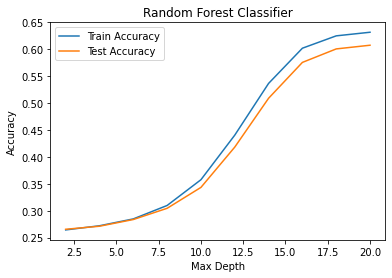

In [55]:
import matplotlib.pyplot as plt
import tqdm

depths = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

train_accuracies = []
test_accuracies = []
#progress bar
for depth in tqdm.tqdm(depths):
    #Initialize the classifier
    classifier = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=0)

    #Split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(youtube_data[['positive_sentiment', 'negative_sentiment', 'total_sentiment']], youtube_data['categoryId'], test_size=0.2, random_state=0)

    #Fit the model
    classifier.fit(X_train, y_train)

    #Predict the test data
    y_pred = classifier.predict(X_test)

    #Print the accuracy score
    train_accuracies.append(accuracy_score(y_train, classifier.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(depths, train_accuracies, label='Train Accuracy')
plt.plot(depths, test_accuracies, label='Test Accuracy')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
#Title of the plot
plt.title('Random Forest Classifier')
plt.show()

In [54]:
#print final accuracies
print("Training Accuracy: ", train_accuracies)
print("Testing Accuracy: ", test_accuracies)

Training Accuracy:  [0.2643708924376245, 0.2722812026050495, 0.28394841446853225, 0.31039541638167745, 0.3572327792151148, 0.441886975743698, 0.5383372488377395, 0.6038401681188728, 0.6269366877806525, 0.6319822364964661]
Testing Accuracy:  [0.26569128900519406, 0.2716387137702708, 0.28226477935054123, 0.30486499345783274, 0.34328535744022837, 0.41937274493477655, 0.5091788588874351, 0.5784465326513619, 0.6030292216803458, 0.6074303160065025]


100%|██████████| 10/10 [05:45<00:00, 34.59s/it]


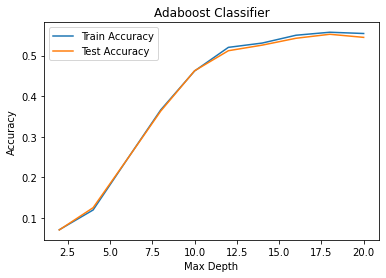

In [51]:
#Use Decision stump ensemble method to classify the data

depths = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

adaboost_train_accuracies = []
adaboost_test_accuracies = []

for depth in tqdm.tqdm(depths):
    classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth), n_estimators=200)
    X_train, X_test, y_train, y_test = train_test_split(youtube_data[['positive_sentiment', 'negative_sentiment', 'total_sentiment']], youtube_data['categoryId'], test_size=0.2, random_state=0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    adaboost_train_accuracies.append(accuracy_score(y_train, classifier.predict(X_train)))
    adaboost_test_accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(depths, adaboost_train_accuracies, label='Train Accuracy')
plt.plot(depths, adaboost_test_accuracies, label='Test Accuracy')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Adaboost Classifier')
plt.show()

In [52]:
#print final accuracies
print("Training Accuracy: ", adaboost_train_accuracies)
print("Testing Accuracy: ", adaboost_test_accuracies)

Training Accuracy:  [0.07068724536830523, 0.11949722940890753, 0.24342542203189896, 0.36610461831266544, 0.4619799565825081, 0.5202268018754771, 0.5308234454456241, 0.550123412733815, 0.5574786134158067, 0.5543858605683925]
Testing Accuracy:  [0.07033821022164069, 0.1250941675587804, 0.243487569882241, 0.36330835414932, 0.4624717497323659, 0.5119543237778043, 0.5257126997343483, 0.5426430355656001, 0.5524761111771936, 0.5448634074778954]


In [57]:
depths = range(2, 102, 2)
depths = list(depths)
depths

[2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20,
 22,
 24,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 40,
 42,
 44,
 46,
 48,
 50,
 52,
 54,
 56,
 58,
 60,
 62,
 64,
 66,
 68,
 70,
 72,
 74,
 76,
 78,
 80,
 82,
 84,
 86,
 88,
 90,
 92,
 94,
 96,
 98,
 100]

100%|██████████| 20/20 [03:33<00:00, 10.67s/it]


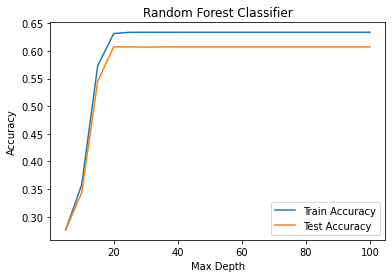

In [58]:
import matplotlib.pyplot as plt
import tqdm

depths = list(range(5, 105, 5))

train_accuracies = []
test_accuracies = []
#progress bar
for depth in tqdm.tqdm(depths):
    #Initialize the classifier
    classifier = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=0)

    #Split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(youtube_data[['positive_sentiment', 'negative_sentiment', 'total_sentiment']], youtube_data['categoryId'], test_size=0.2, random_state=0)

    #Fit the model
    classifier.fit(X_train, y_train)

    #Predict the test data
    y_pred = classifier.predict(X_test)

    #Print the accuracy score
    train_accuracies.append(accuracy_score(y_train, classifier.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(depths, train_accuracies, label='Train Accuracy')
plt.plot(depths, test_accuracies, label='Test Accuracy')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
#Title of the plot
plt.title('Random Forest Classifier')
plt.show()

In [59]:
#print final accuracies
print("Training Accuracy: ", train_accuracies)
print("Testing Accuracy: ", test_accuracies)

Training Accuracy:  [0.27618679434184834, 0.35767884933733807, 0.5734280984526323, 0.6317145944231322, 0.6338557310098036, 0.6340044210505447, 0.6340143337199274, 0.6340143337199274, 0.6340143337199274, 0.6340143337199274, 0.6340143337199274, 0.6340143337199274, 0.6340143337199274, 0.6340143337199274, 0.6340143337199274, 0.6340143337199274, 0.6340143337199274, 0.6340143337199274, 0.6340143337199274, 0.6340143337199274]
Testing Accuracy:  [0.2761191070932953, 0.3434043059355299, 0.5456167479481384, 0.6075889140002378, 0.6074699655049364, 0.6071131200190317, 0.6073906665080687, 0.6074303160065025, 0.6074303160065025, 0.6074303160065025, 0.6074303160065025, 0.6074303160065025, 0.6074303160065025, 0.6074303160065025, 0.6074303160065025, 0.6074303160065025, 0.6074303160065025, 0.6074303160065025, 0.6074303160065025, 0.6074303160065025]


100%|██████████| 10/10 [1:00:50<00:00, 365.05s/it]


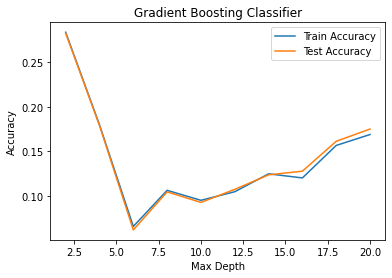

In [60]:
depths = list(range(2, 22, 2))

gb_train_accuracies = []
gb_test_accuracies = []

for depth in tqdm.tqdm(depths):
    classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=depth, random_state=0)
    X_train, X_test, y_train, y_test = train_test_split(youtube_data[['positive_sentiment', 'negative_sentiment', 'total_sentiment']], youtube_data['categoryId'], test_size=0.2, random_state=0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    gb_train_accuracies.append(accuracy_score(y_train, classifier.predict(X_train)))
    gb_test_accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(depths, gb_train_accuracies, label='Train Accuracy')
plt.plot(depths, gb_test_accuracies, label='Test Accuracy')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Gradient Boosting Classifier')
plt.show()

100%|██████████| 6/6 [09:33<00:00, 95.54s/it] 


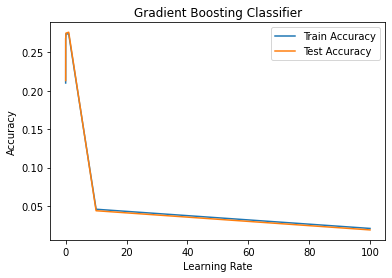

In [61]:
learning_rates = [0.001, 0.01, 0.1, 1, 10, 100]

gb_train_accuracies = []
gb_test_accuracies = []

for lr in tqdm.tqdm(learning_rates):
    classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=lr, max_depth=1, random_state=0)
    X_train, X_test, y_train, y_test = train_test_split(youtube_data[['positive_sentiment', 'negative_sentiment', 'total_sentiment']], youtube_data['categoryId'], test_size=0.2, random_state=0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    gb_train_accuracies.append(accuracy_score(y_train, classifier.predict(X_train)))
    gb_test_accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(learning_rates, gb_train_accuracies, label='Train Accuracy')
plt.plot(learning_rates, gb_test_accuracies, label='Test Accuracy')
plt.legend()
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Gradient Boosting Classifier')
plt.show()

In [62]:
print("Training Accuracy: ", gb_train_accuracies)
print("Testing Accuracy: ", gb_test_accuracies)

Training Accuracy:  [0.2100593768896026, 0.2678304140522001, 0.27410513377147333, 0.27392670572258404, 0.04563792983812611, 0.020638177654860677]
Testing Accuracy:  [0.2132350025772174, 0.2678323619206217, 0.2750089211371476, 0.2761587565917291, 0.04369374727409698, 0.018714563260774753]
